In [1]:
import os, sys
sys.path.append(os.path.join('/home/ring/sumo-svn/', 'tools'))
import traci
import traci.constants as tc
import numpy as np
from sumolib import checkBinary
import datetime
import matplotlib
import matplotlib.pyplot as plt
import torch
import copy
import csv
import pandas as pd

In [2]:
# decision_threshold
threshold = {'ONNUT_FP1_END_FLOW' : 10,
'ONNUT_FP2_END_FLOW' :  0.25,
'ONNUT_FP1_TP2_UNJAM' : 250,
# 'PHRAKHANONG_EB_FP1_END_FLOW': 0,
'SUKHUMVIT71_SB_FP2_TP3': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM_ONNUT': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP3_TP1_UNJAM': 0,
            }
duration={ 
'ONNUT_FP1_END_MAXGREEN' : 180,
'ONNUT_FP2_END_MAXGREEN' : 60,
'ONNUT_FP1_END_MINGREEN': 30,
'ONNUT_FP2_END_MINGREEN':30 ,
# 'PHRAKHANONG_SUKHUMVIT71_FP1_END_MINGREEN': 30,
# 'PHRAKHANONG_SUKHUMVIT71_FP1_END_MAXGREEN': 60,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_END_MINGREEN': 30,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_END_MAXGREEN': 60,
# 'PHRAKHANONG_SUKHUMVIT71_FP3_END_MINGREEN': 30,
# 'PHRAKHANONG_SUKHUMVIT71_FP3_END_MAXGREEN': 60
}

count = {'ONNUT_FP1_END_FLOW' : 0,
'ONNUT_FP2_END_FLOW' :  0,
'ONNUT_FP1_TP2_UNJAM' : 0,
'ONNUT_FP1_END_MAXGREEN' : 0,
'ONNUT_FP2_END_MAXGREEN' : 0,
'ONNUT_FP1_END_MINGREEN': 0,
'ONNUT_FP2_END_MINGREEN':0,
# 'PHRAKHANONG_SUKHUMVIT71_FP1_END_MINGREEN': 0,
# 'PHRAKHANONG_EB_FP1_END_FLOW': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP1_END_MAXGREEN': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_END_MINGREEN': 0,
# 'SUKHUMVIT71_SB_FP2_TP3': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_END_MAXGREEN': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM' :0,
# 'PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM_ONNUT': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP3_END_MINGREEN': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP3_TP1_UNJAM': 0,
# 'PHRAKHANONG_SUKHUMVIT71_FP3_END_MAXGREEN': 0
        }

In [3]:
namelane_csv = pd.read_csv('namelane_ONNUT.csv')
namelane_df = pd.DataFrame(namelane_csv, columns = ['name' , 'id'])
NAME = namelane_df.set_index('name')
ID = namelane_df.set_index('id')

In [4]:
ID.loc['824816458#0_2']

name    SUKHUMVIT71_WB_0_2_XSXX
Name: 824816458#0_2, dtype: object

In [5]:
namedetector_csv = pd.read_csv('namedetector_ONNUT_extend.csv')
namedetector_df = pd.DataFrame(namedetector_csv, columns = ['name' , 'id'])
NAME_D = namedetector_df.set_index('name')
ID_D = namedetector_df.set_index('id')
listdetector = open("namedetector_ONNUT_extend.txt", "r")
detector = {}
for l in listdetector:
    l = l.strip().split(' ')
    if len(l)> 1:
        d = []
        for detec in l[2:]:
            if type(NAME_D.loc[detec,'id']) == str:
                d.append(NAME_D.loc[detec,'id'])
            else : d.append(NAME_D.loc[detec,'id'][0])
    detector[str(l[0])] = d

In [6]:
# ONNUT_EB = [NAME.loc['ONNUT_EB_0_0_LSXX','id']]
# ONNUT_SB = [NAME.loc['ONNUT_SB_0_0_LSXX','id'],NAME.loc['ONNUT_SB_0_1_XSXX','id'],NAME.loc['ONNUT_SB_0_2_XSXX','id'],NAME.loc['ONNUT_SB_0_3_XSXX','id'],NAME.loc['ONNUT_SB_1_0_LSXX','id'],NAME.loc['ONNUT_SB_1_1_XSXX','id'],NAME.loc['ONNUT_SB_1_2_XSXX','id'],NAME.loc['ONNUT_SB_1_3_XSXX','id'],NAME.loc['ONNUT_SB_2_0_LSXX','id'],NAME.loc['ONNUT_SB_2_1_XSXX','id'],NAME.loc['ONNUT_SB_2_2_XSXX','id'],NAME.loc['ONNUT_SB_2_3_XSXX','id'],NAME.loc['ONNUT_SB_3_0_LSXX','id'],NAME.loc['ONNUT_SB_3_1_XSXX','id'],NAME.loc['ONNUT_SB_3_2_XSXX','id'],NAME.loc['ONNUT_SB_3_3_XSXX','id'],NAME.loc['ONNUT_SB_4_0_XSXX','id'],NAME.loc['ONNUT_SB_4_1_XSXX','id'],NAME.loc['ONNUT_SB_4_2_XSXX','id']]
detector

{'ONNUT_SB_FP1_END': ['D824116560#3_0',
  'D824116560#3_1',
  'D824116560#3_2',
  'D824116560#3_3',
  'D824116560#2_0',
  'D824116560#2_1',
  'D824116560#2_2',
  'D824116560#2_3',
  'D824116560#1_0',
  'D824116560#1_1',
  'D824116560#1_2',
  'D824116560#1_3',
  'D824116560#0_0',
  'D824116560#0_1',
  'D824116560#0_2',
  'D824116560#0_3',
  'D824816455_0',
  'D824816455_1',
  'D824816455_2'],
 'ONNUT_WB_FP2_END': ['D156591171#2_0',
  'D156591171#2_1',
  'D156591171#2_2',
  'D156591171#0_0',
  'D156591171#0_1',
  'D156591171#0_2'],
 'ONNUT_WB_FP1_TP2': ['D-824456409#0_0',
  'D-824456409#0_1',
  'D-824456409#4_0',
  'D-824456409#4_1',
  'D-824456409#5_0',
  'D-824456409#5_1',
  'D-113135397#0_0',
  'D-113135397#0_1'],
 'PHRAKHANONG_EB_FP1_TP2': ['D336620983#5_0',
  'D336620983#5_1',
  'D336620983#5_2'],
 'SUKHUMVIT71_SB_FP2_TP3': ['D156591249#1_0',
  'D156591249#1_1',
  'D156591249#0.2206_0',
  'D156591249#0.2206_1'],
 'ONNUT_SB_FP2_TP3': ['D300825126#0_0',
  'D300825126#0_1',
  'D3008251

In [7]:
#reset the environment
def start():
    sumoBinary = checkBinary('sumo-gui')
    traci.start([sumoBinary, "-c", "Onnut/onnut.sumocfg",
                             "--tripinfo-output", "tripinfo.xml", '--start','true','--quit-on-end','true','--time-to-teleport','-1'])

In [8]:
id = {'Onnut': 'cluster_1088409501_272206263_5136790697_70702637',
     'PHRAKHANONG' : 'cluster_272206256_272448121_277360977',
     'SUKHUMVIT71' : 'cluster_313173111_3810777044'}
number_phase = [2,7,7]
# detecters = {'QA' : ['156261350#0'], 'QB' : ['-453962283#3'], 'QC' : ['459551209#0', '459551209#3'], 'QD' : ['27702347#0', '27702347#4', '27702347#6']}

In [9]:
def get_occupancy_average_percent(detector_id): 
    #get occupancy average for all detector in detector_id and scale by (Vehicle Length + MinimumGap)/MinimumGap 
    #Vehicle Length = 4.62 MinimumGap = 2.37
    occupancy = (sum([traci.lanearea.getLastStepOccupancy(e) for e in detector_id])/len(detector_id))*((4.62+2.37)/4.62)
    return occupancy

In [10]:
def get_flow_sum(detector_id):
#     Speed (metres per sec) = flow (vehicle per sec) / density (veh per metre), Ajarn chaodit
#         flow= int(densityPerLane) * float(meanSpeed)#flow per lane
#     print('LastStepVehicleNumber', sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id]))
#     print('length', sum([traci.lanearea.getLength(i) for i in detector_id]))
#     density = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])/\
#     sum([traci.lanearea.getLength(i) for i in detector_id])
#     print('density', density)
    
    flow = sum(([traci.lanearea.getLastStepVehicleNumber(e)*traci.lanearea.getLastStepMeanSpeed(e)/traci.lanearea.getLength(e) for e in detector_id if
              traci.lanearea.getLastStepMeanSpeed(e) >= 0]))
    return flow

In [11]:
def get_mean_speed(detector_id):
    mean_speed = sum([traci.lanearea.getLastStepMeanSpeed(e) for e in detector_id])/len(detector_id)
    return mean_speed

In [12]:
def get_unjamlength_meters(detector_id): 
    detector_length = sum(traci.lanearea.getLength(d) for d in detector_id)
    unjamlength = detector_length - (sum([traci.lanearea.getJamLengthMeters(e) for e in detector_id])) #/detector_length
    return unjamlength

In [13]:
junction_name = list(id.keys()) 
def take_action(new_selected_traffic_signal_phases):
#     ==
# Function take_action takes inputs, namely, 

# new_selected_traffic_signal_phases[even indec] = current phase of traffic light signal from previous decision time step
# new_selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interruption would occur

# and returns outputs, namely,

# JamLengthMeter = sum of jam length in detectors area
# Speed = sum of speed of all vehicles in detectors area
#     ==
#     print(new_selected_traffic_signal_phases)
    change_to_phase = new_selected_traffic_signal_phases[0::2]
    change_to_phase_sumo = [e for e in change_to_phase]
#     print(change_to_phase)
    current_phase = [traci.trafficlight.getPhase(id[key]) for key in id.keys()]
    for i in range(1):
#         if change_to_phase[i] != current_phase[i]:
#             yellow = (change_to_phase[i]-1)%(2*number_phase[i])
# #             print(yellow)
# #             print(junction_name[i])
#             traci.trafficlight.setPhase(id[junction_name[i]], yellow) #  YELLOW PHASE 
#         else:
        traci.trafficlight.setPhase(id[junction_name[i]], change_to_phase_sumo[i]) # No YELLOW PHASE 
    throughput = 0
    for i in range(15):
        throughput += get_throughput()
        traci.simulationStep()
#     w1 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
#     w2 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
    JamLengthPercent= sum([traci.lanearea.getJamLengthMeters(i) for i in list(NAME_D['id'])])/sum([traci.lanearea.getLength(i) for i in list(NAME_D['id'])])
    Speed = sum([traci.lanearea.getLastStepMeanSpeed(i) for i in list(NAME_D['id'])])/(len(list(NAME_D['id'])))
    Flow = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in list(NAME_D['id'])])
    
#     WaitingTime = sum([traci.lane.getWaitingTime(i) for i in lane])
#     HaltingNumber = sum([traci.lane.getLastStepHaltingNumber(i) for i in  lane]) #list(NAME['id'])
#     Traveltime = sum([traci.lane.getTraveltime(i) for i in  lane])
   
    return JamLengthPercent,Speed,Flow,throughput #,WaitingTime, HaltingNumber,  Traveltime 

In [14]:
def ONNUT_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
#Onnut
    greentime_duration = list_greentime_duration[0]
    current_phase = selected_traffic_signal_phases[0]
    next_phase_ifno_interupt = selected_traffic_signal_phases[1]
#     print('get_flow_sum(get_detector_id(Onnut_edge[WB]))', get_flow_sum(get_detector_id(Onnut_edge['WB'])))
#     print('get_flow_sum(get_detector_id(Onnut_edge[SB]))', get_flow_sum(get_detector_id(Onnut_edge['SB'])))
#     print('unjamlength_meters Onnut_edge WB', get_unjamlength_meters(get_detector_id(Onnut_edge['WB'])))
#     print('occupancy Onnut_edge SB', get_occupancy_average_percent(get_detector_id(Onnut_edge['SB'])))
    if current_phase == 1:
        if duration['ONNUT_FP1_END_MINGREEN'] >= greentime_duration:
            count['ONNUT_FP1_END_MINGREEN'] +=1 
            current_phase = 1
        elif (get_occupancy_average_percent(detector['ONNUT_SB_FP1_END']) <= threshold['ONNUT_FP1_END_FLOW']) or (greentime_duration >= duration['ONNUT_FP1_END_MAXGREEN'] ): 
            if (get_occupancy_average_percent(detector['ONNUT_SB_FP1_END']) <= threshold['ONNUT_FP1_END_FLOW']) :
                count['ONNUT_FP1_END_FLOW'] +=1 
            if (greentime_duration >= duration['ONNUT_FP1_END_MAXGREEN'] ): 
                count['ONNUT_FP1_END_MAXGREEN'] +=1 
            current_phase = 2
        elif get_unjamlength_meters(detector['ONNUT_WB_FP1_TP2']) <= threshold['ONNUT_FP1_TP2_UNJAM'] :
            count['ONNUT_FP1_TP2_UNJAM'] +=1 
            current_phase = 2
    elif current_phase == 2: #***
        if duration['ONNUT_FP2_END_MINGREEN'] >= greentime_duration:
            count['ONNUT_FP2_END_MINGREEN'] +=1 
            current_phase = 2
        elif get_flow_sum(detector['ONNUT_WB_FP2_END']) <= threshold['ONNUT_FP2_END_FLOW'] or greentime_duration >= duration['ONNUT_FP2_END_MAXGREEN']:
            if get_flow_sum(detector['ONNUT_WB_FP2_END']) <= threshold['ONNUT_FP2_END_FLOW'] :
                count['ONNUT_FP2_END_FLOW'] +=1 
            if greentime_duration >= duration['ONNUT_FP2_END_MAXGREEN']:
                count['ONNUT_FP2_END_MAXGREEN'] +=1
            current_phase = 1
    if selected_traffic_signal_phases[0] == current_phase:
        greentime_duration += 15
    else: greentime_duration = 0
    Onnut_phase = current_phase
    next_Onnut_phase_ifno_interupt = next_phase_ifno_interupt
    new_greentime_duration = greentime_duration
#     action = [ KlongTei_phase, None, Rama4_phase,  next_Rama4_phase, 0, None, 0, None, 0, None, 0, None]
    return  new_greentime_duration, Onnut_phase, next_Onnut_phase_ifno_interupt

In [15]:
def get_throughput():
    loopID = ['L751454884#3_0','L751454884#3_1','L751454884#3_2','L156591171#2_0','L156591171#2_1','L156591171#2_2','L824116560#3_0','L824116560#3_1','L824116560#3_2','L824116560#3_3','L-93727606#1_0']
    throughput = sum([traci.inductionloop.getLastStepVehicleNumber(i) for i in loopID if traci.inductionloop.getLastStepMeanSpeed(i) > 0])  #if traci.inductionloop.getLastStepMeanSpeed(i) > 0
    return throughput

In [16]:
# def PHRAKHANONG_SUKHUMVIT71_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
#     greentime_duration = list_greentime_duration[1]
#     current_phase = selected_traffic_signal_phases[2]
#     next_phase_ifno_interupt = selected_traffic_signal_phases[3]
# #     print('get_flow_sum(get_detector_id(Onnut_edge[WB]))', get_flow_sum(get_detector_id(Onnut_edge['WB'])))
# #     print('get_flow_sum(get_detector_id(Onnut_edge[SB]))', get_flow_sum(get_detector_id(Onnut_edge['SB'])))
# #     print('unjamlength_meters Onnut_edge WB', get_unjamlength_meters(get_detector_id(Onnut_edge['WB'])))
# #     print('occupancy Onnut_edge SB', get_occupancy_average_percent(get_detector_id(Onnut_edge['SB'])))
#     if current_phase == 1:
#         if duration['PHRAKHANONG_SUKHUMVIT71_FP1_END_MINGREEN'] >= greentime_duration:
#             count['PHRAKHANONG_SUKHUMVIT71_FP1_END_MINGREEN'] +=1 
#             current_phase = 1
#         elif (get_flow_sum(detector['PHRAKHANONG_EB_FP1_TP2']) <= threshold['PHRAKHANONG_EB_FP1_END_FLOW']) or (greentime_duration >= duration['PHRAKHANONG_SUKHUMVIT71_FP1_END_MAXGREEN'] ): 
#             if (get_flow_sum(detector['PHRAKHANONG_EB_FP1_TP2']) <= threshold['PHRAKHANONG_EB_FP1_END_FLOW'])  :
#                 count['PHRAKHANONG_EB_FP1_END_FLOW'] +=1 
#             if (greentime_duration >= duration['PHRAKHANONG_SUKHUMVIT71_FP1_END_MAXGREEN'] ): 
#                 count['PHRAKHANONG_SUKHUMVIT71_FP1_END_MAXGREEN'] +=1 
#             current_phase = 2
#     elif current_phase == 2: #***
#         if duration['PHRAKHANONG_SUKHUMVIT71_FP2_END_MINGREEN'] >= greentime_duration:
#             count['PHRAKHANONG_SUKHUMVIT71_FP2_END_MINGREEN'] +=1 
#             current_phase = 2
#         elif get_unjamlength_meters(detector['SUKHUMVIT71_SB_FP2_TP3']) <= threshold['PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM'] or \
#         greentime_duration >= duration['PHRAKHANONG_SUKHUMVIT71_FP2_END_MAXGREEN'] or\
#         get_unjamlength_meters(detector['ONNUT_SB_FP2_TP3']) <= threshold['PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM_ONNUT']:
#             if get_unjamlength_meters(detector['SUKHUMVIT71_SB_FP2_TP3']) <= threshold['PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM']:
#                 count['SUKHUMVIT71_SB_FP2_TP3'] +=1 
#             if greentime_duration >= duration['PHRAKHANONG_SUKHUMVIT71_FP2_END_MAXGREEN'] :
#                 count['PHRAKHANONG_SUKHUMVIT71_FP2_END_MAXGREEN'] +=1
#             if get_unjamlength_meters(detector['ONNUT_SB_FP2_TP3']) <= threshold['PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM_ONNUT']:
#                 count['PHRAKHANONG_SUKHUMVIT71_FP2_TP3_UNJAM_ONNUT'] += 1
#             current_phase = 3
#     elif current_phase == 3: #***
#         if duration['PHRAKHANONG_SUKHUMVIT71_FP3_END_MINGREEN'] >= greentime_duration:
#             count['PHRAKHANONG_SUKHUMVIT71_FP3_END_MINGREEN'] +=1 
#             current_phase = 2
#         elif get_unjamlength_meters(detector['PHRAKHANONG_EB_FP3_TP1']) <= threshold['PHRAKHANONG_SUKHUMVIT71_FP3_TP1_UNJAM']:
#             if get_unjamlength_meters(detector['PHRAKHANONG_EB_FP3_TP1']) <= threshold['PHRAKHANONG_SUKHUMVIT71_FP3_TP1_UNJAM']:
#                 count['PHRAKHANONG_SUKHUMVIT71_FP3_TP1_UNJAM'] +=1 
#             if threshold['PHRAKHANONG_SUKHUMVIT71_FP3_TP1_MAXGREEN'] >= greentimeduration:
#                 count['PHRAKHANONG_SUKHUMVIT71_FP3_TP1_MAXGREEN'] +=1 
#             current_phase = 1
#     if selected_traffic_signal_phases[2] == current_phase:
#         greentime_duration += 5
#     else: greentime_duration = 0
#     PHRAKHANONG_SUKHUMVIT71_phase = current_phase
#     next_PHRAKHANONG_SUKHUMVIT71_phase_ifno_interupt = None
#     new_greentime_duration = greentime_duration
# #     action = [ KlongTei_phase, None, Rama4_phase,  next_Rama4_phase, 0, None, 0, None, 0, None, 0, None]
#     return new_greentime_duration, PHRAKHANONG_SUKHUMVIT71_phase, next_PHRAKHANONG_SUKHUMVIT71_phase_ifno_interupt

In [17]:
def find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration): 
#     ==
# Function traffic_police_action takes inputs, namely, 

# selected_traffic_signal_phases[even index] = current phase of traffic light signal from previous decision time step
# selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interruption would occur
# greentime_duration = number of seconds that current phase of traffic light signal has been used
# max_greentime_duration = maximum allowable number of seconds for current phase of traffic light signal

# and returns outputs, namely,

# new_selected_traffic_signal_phases = new value of selected_traffic_signal_phases[0] and selected_traffic_signal_phases[1] (defined above) to be deployed till next decision time step
# new_greentime_duration = new value of greentime_duration to be deployed till next decision time step
#     ==


    ONNUT_greentime_duration,ONNUT_phase, next_ONNUT_phase_ifno_interupt = ONNUT_find_action(selected_traffic_signal_phases,list_greentime_duration,\
                                                                                             threshold, duration)
#     PHRAKHANONG_SUKHUMVIT71_greentime_duration,PHRAKHANONG_SUKHUMVIT71_phase, next_PHRAKHANONG_SUKHUMVIT71_phase_ifno_interupt = PHRAKHANONG_SUKHUMVIT71_find_action(selected_traffic_signal_phases,list_greentime_duration, \
#                                                                                                                threshold, duration)
    
#     PHRAKHANONG_phase = PHRAKHANONG_SUKHUMVIT71_phase
#     SUKHUMVIT71_phase = PHRAKHANONG_SUKHUMVIT71_phase
    return [ONNUT_phase, None],[ONNUT_greentime_duration] #, PHRAKHANONG_phase, None, SUKHUMVIT71_phase, None], [ONNUT_greentime_duration, PHRAKHANONG_SUKHUMVIT71_greentime_duration]

In [18]:
reward_memory = []
def plot_durations():
    print('show')
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(reward_memory, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated

In [19]:
ONNUT_WB = ['-113135397#26_0','-113135397#26_1','-113135397#24_0','-113135397#24_1','-113135397#21_0','-113135397#21_1','-113135397#20_0','-113135397#20_1','-113135397#19_0','-113135397#19_1','-113135397#18_0','-113135397#18_1','-113135397#17_0','-113135397#17_1','-113135397#16_0','-113135397#16_1','-113135397#15_0','-113135397#15_1','-113135397#13_0','-113135397#13_1','-113135397#12_0','-113135397#12_1','-113135397#10_0','-113135397#10_1','-113135397#8_0','-113135397#8_1','-113135397#7_0','-113135397#7_1','-113135397#6_0','-113135397#6_1','-113135397#4_0','-113135397#4_1','-113135397#2_0','-113135397#2_1','-113135397#0_0','-113135397#0_1','-824456409#5_0','-824456409#5_1','-824456409#4_0','-824456409#4_1','-824456409#0_0','-824456409#0_1','156591171#0_0','156591171#0_1','156591171#0_2','156591171#2_0','156591171#2_1','156591171#2_2']
ONNUT_SB = ['824116560#3_0','824116560#3_1','824116560#3_2','824116560#3_3','824116560#2_0','824116560#2_1','824116560#2_2','824116560#2_3','824116560#1_0','824116560#1_1','824116560#1_2','824116560#1_3','824116560#0_0','824116560#0_1','824116560#0_2','824116560#0_3','824816455_0','824816455_1','824816455_2']

ONNUT_NB = ['751455690#0_0','751455690#0_1','751455690#0_2','751454884#0_0','751454884#0_1','751454884#0_2','751454884#2_0','751454884#2_1','751454884#2_2','751454884#3_0','751454884#3_1','751454884#3_2']
ONNUT_backlog =ONNUT_WB + ONNUT_SB + ONNUT_NB
with open( "./Raytest/ray_results/onnut_occfull.csv" , 'w', newline='') as csv_file:
    header = ['rewards', 'throughput','backlog',"meanWaitingTime", "meanTravelTime","meanSpeed","action"]
    writer = csv.DictWriter(csv_file, fieldnames = header)
    writer.writeheader()
        
def episode0(threshold, duration):
    #episode = 0
    action = []
    reward_memory = []
    JamLengthPercent_memory = []
    Speed_memory = []
    throughput_memory = []
    list_greentime_duration = [0, 0]
    start()
    traci.simulationStep()
    selected_traffic_signal_phases = [1, None,1 ,None]
    for seconds in range(960): #2880
#         state, len_state = get_state() #minimum_remaining_time = Q-lengthเมตร/free flow speed
        new_selected_traffic_signal_phases, new_greentime_duration = find_action(selected_traffic_signal_phases,
            list_greentime_duration, threshold, duration)
#         print( new_selected_traffic_signal_phases, new_greentime_duration)
#         print(count)
        JamLengthPercent,Speed,Flow,throughput = take_action(new_selected_traffic_signal_phases)
        action.append(new_selected_traffic_signal_phases[0])
        JamLengthPercent_memory.append(JamLengthPercent)
        Speed_memory.append(Speed)
        throughput_memory.append(throughput)
        backlog = sum([traci.lanearea.getLastStepVehicleNumber(i) for i in ONNUT_backlog])
#         print(JamLengthMeter)
#         print(Speed)
#         print(state)
        selected_traffic_signal_phases = new_selected_traffic_signal_phases
        list_greentime_duration = new_greentime_duration 
        with open( "./onnut_police.csv" , 'a', newline='') as csv_file:
            header = ['throughput','backlog',"meanSpeed","JamLengthPercent"]
            writer = csv.DictWriter(csv_file, fieldnames = header)
            writer.writerow({'throughput': throughput , 
                            'backlog': backlog,"meanSpeed":Speed,"JamLengthPercent":JamLengthPercent
                            })

#         with open('output.csv', mode='w', newline='') as csv_file:
#             writer = csv.writer(csv_file)
#             writer.writerow(['throughput'])
#             writer.writerows([throughput_memory])
#             writer.writerow(['Jam'])
#             writer.writerows([JamLengthPercent_memory])
            
    plt.figure(2)
    plt.clf() 
    plt.plot(throughput_memory)
    
#     line_up, = plt.plot(JamLengthMeter_memory)
#     line_mid,  =  plt.plot(Speed_memory)
#     line_down, = plt.plot(throughput_memory)
#     plt.legend([line_up, line_down], ['JamLengthMeter', 'Speed','throughput'])
    plt.pause(0.001)
    traci.close()
    return action, throughput_memory

In [20]:
# traci.close()

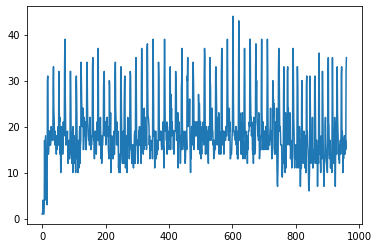

[1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 

In [21]:
action,throughput_memory = episode0(threshold, duration) #PEAM
print(action)

In [22]:
count

{'ONNUT_FP1_END_FLOW': 2,
 'ONNUT_FP2_END_FLOW': 0,
 'ONNUT_FP1_TP2_UNJAM': 17,
 'ONNUT_FP1_END_MAXGREEN': 39,
 'ONNUT_FP2_END_MAXGREEN': 58,
 'ONNUT_FP1_END_MINGREEN': 175,
 'ONNUT_FP2_END_MINGREEN': 174}

In [23]:
print(action)

[1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 

In [24]:
print(sum(throughput_memory))

18078
